In [28]:
import pandas as pd #include all the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [29]:
#this will remove all the unnecessary warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [30]:
#now we load the dataset from csv file and print data in it
dataframe=pd.read_csv("data.csv")
print(dataframe)

       Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4     

In [31]:
#now we clean the data in it
dataframe.fillna(0)
#we shall remove the unnamed columns from the dataset
missing_data = pd.isna(dataframe.columns).sum()
print("Missing data:"+str(missing_data))

Missing data:0


In [32]:
#now tTo get some insight of data we shall display the names of players who have an overall more than 88 and potential more than 90

a=dataframe.loc[dataframe['Potential']>=90]
b=dataframe.loc[dataframe['Overall']>=88]
print("Players with Potential higher than and equal to 90\n")
print(a.Name)
print("Players with Overall higher than and equal to 88\n")
print(b.Name)

Players with Potential higher than and equal to 90

0                  L. Messi
1         Cristiano Ronaldo
2                 Neymar Jr
3                    De Gea
4              K. De Bruyne
5                 E. Hazard
6                 L. Modrić
7                 L. Suárez
8              Sergio Ramos
9                  J. Oblak
10           R. Lewandowski
11                 T. Kroos
12                 D. Godín
13              David Silva
14                 N. Kanté
15                P. Dybala
16                  H. Kane
17             A. Griezmann
18            M. ter Stegen
19              T. Courtois
25                K. Mbappé
27                 Casemiro
30                     Isco
31               C. Eriksen
42                S. Umtiti
43                M. Icardi
44             K. Koulibaly
45                 P. Pogba
55                  L. Sané
56           Bernardo Silva
57                  Ederson
62                R. Varane
77              M. Škriniar
78      S. Milinković-Sa

<Figure size 1440x2160 with 0 Axes>

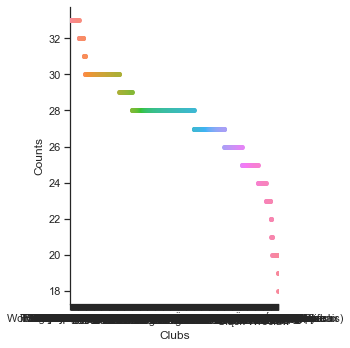

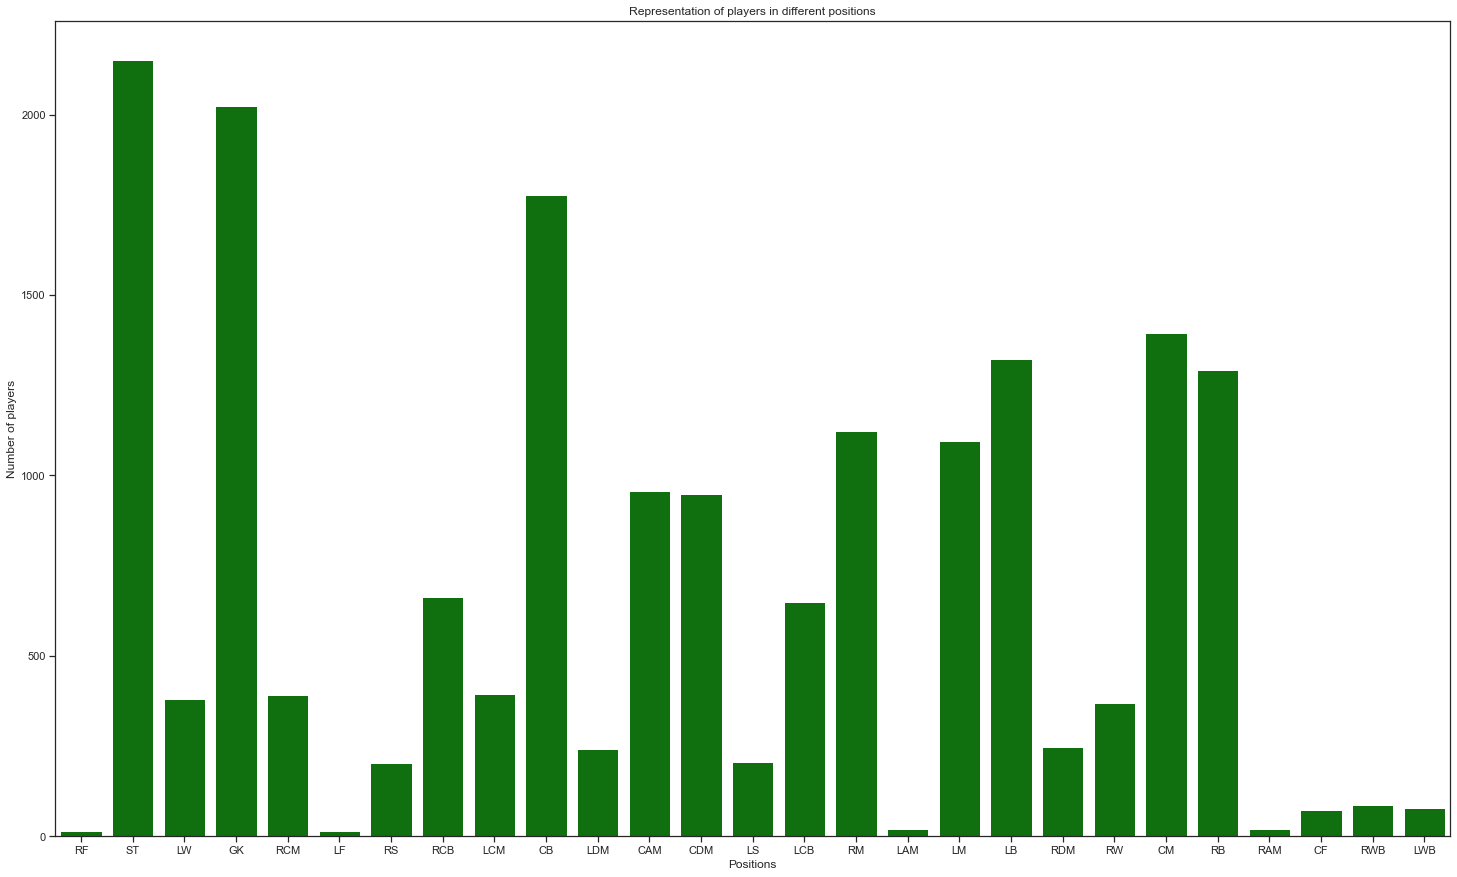

In [16]:
#To understand relationship between columns of FIFA dataset. Used plotting (catplot of seaborn package) to plot the number of players in the club(s) and the team position along with their counts.
counts_Club = dataframe["Club"].value_counts()
counts_Club = counts_Club.reset_index()
counts_Club.columns= ["Clubs","Counts"]
counts_Club
plt.figure(figsize = (20, 30))
sns.set_theme(style="ticks")
sns.catplot(x = "Clubs", y = "Counts", data = counts_Club)
plt.show()
plt.figure(figsize=(25,15))
sns.countplot('Position', data=dataframe,color="Green")
plt.xlabel("Positions")
plt.ylabel("Number of players")
plt.title("Representation of players in different positions")
plt.show()

In [19]:
#Find best player of LW position
best_LW=dataframe[dataframe.Position=="LW"].sort_values("Overall",ascending=False).iloc[0:1]
print("Best Left Winger is :"+str(best_LW.Name))
print("Overall\t"+str(best_LW.Overall))

Best Left Winger is :2    Neymar Jr
Name: Name, dtype: object
Overall	2    92
Name: Overall, dtype: int64


In [26]:
# function that get best squad in the world based on Lineup.
position = {"defender":["RB","LB","CB","LCB","RCB","RWB","RDM","CDM","LDM","LWB"],
             "midder":["RM","LM","CM","LCM","RCM","RAM","CAM","LAM"],
             "attacker":["RW","RF","CF","LF","LW","RS","ST","LS"]
            }
lineup = [4,3,3]

def get_best_squad(lineup):
    best_squad = dataframe[dataframe.Position == "GK"].sort_values("Overall",ascending=False).iloc[0:1]
    for j, k in zip(position.keys(),range(3)):
        best = []
        for i in position.get(j):
            best.append(dataframe[dataframe.Position == i].sort_values(["Overall","Potential"], ascending=[False,False]).iloc[0])
        best = pd.DataFrame(best).sort_values(["Overall","Potential"], ascending=[False,False])
        best = best.iloc[0:lineup[k]]
        best_squad = pd.concat([best_squad, best])
    return best_squad
best_sqaud = get_best_squad(lineup)
best_sqaud.reset_index(inplace=True)
player_index = list(best_sqaud.loc[:,["index"]].values.reshape(11,))
best_sqaud.drop("index",axis=1,inplace=True)
best_sqaud


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
1,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
2,12,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,€90.2M
3,14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,...,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,€121.3M
4,24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,€44.6M
5,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
6,11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
7,17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,€165.8M
8,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
9,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
